<Axes: >

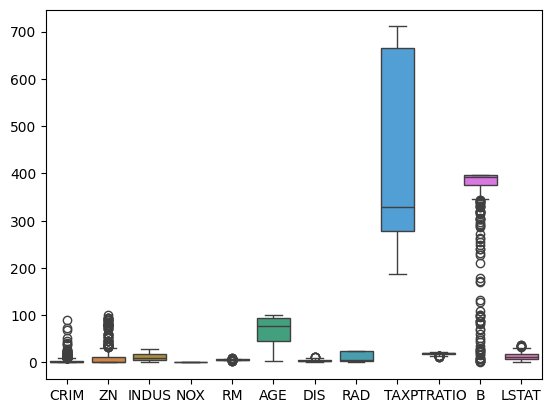

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

data = pd.read_csv(r'C:\Users\nadys\Desktop\Projects\data\boston.csv')

sns.boxplot(data = data.drop(columns=['CHAS', 'MEDV']))

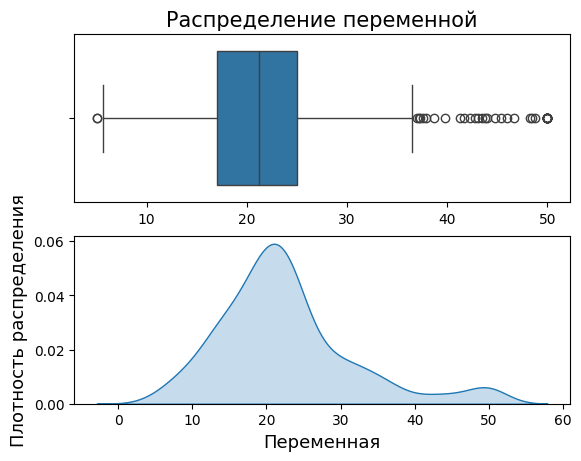

In [66]:
def box_density(x):
    f, (ax_box, ax_kde) = plt.subplots(nrows=2, # две строки
                                       ncols=1, # один столбец
                                       )
    
    sns.boxplot(x=x, ax=ax_box)
    ax_box.set(xlabel=None)

    sns.kdeplot(x, fill=True)

    ax_box.set_title('Распределение переменной', fontsize=15)
    ax_kde.set_xlabel('Переменная', fontsize=13)
    ax_kde.set_ylabel('Плотность распределения', fontsize=13)
    
    plt.show()

box_density(data.iloc[:, -1])

In [67]:
data.drop(columns = 'CHAS').corr().MEDV.to_frame().style.background_gradient().format('{:.2f}')

,MEDV
CRIM,-0.39
ZN,0.36
INDUS,-0.48
NOX,-0.43
RM,0.70
AGE,-0.38
DIS,0.25
RAD,-0.38
TAX,-0.47
PTRATIO,-0.51


In [11]:
statistic_biser, pvalue = stats.pointbiserialr(data.MEDV, data.CHAS)

print(statistic_biser, pvalue)

0.17526017719029846 7.390623170519879e-05


In [58]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=42)
clf.fit(data)

data['anomaly'] = clf.predict(data)
data = data[data.anomaly == 1]
data = data.drop(columns='anomaly')
data.shape

(402, 14)

In [62]:
data.iloc[:, :-1] = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()
data.CHAS.value_counts()

CHAS
-0.182581    389
 5.463391     13
Name: count, dtype: int64

In [64]:
from sklearn.linear_model import LinearRegression

X = data.drop('MEDV', axis=1)
y = data['MEDV']

model = LinearRegression()
y_pred = model.fit(X, y).predict(X)

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
factors = {'CRIM': 'Преступность',
           'TAX': 'Налог на недвижимость',
           'AGE': 'Возраст людей, которым принадлежит дом',
           'PTRATIO': 'Соотношение числа учащихся и преподавателей в районе'}

aims = {'MEDV': 'Средняя стоимость дома',
        'NOX': 'Уровень закиси азота'}